In [1]:
import numpy as np
import pandas as pd
import difflib
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizer - This is used to convert text data into numerical values
from sklearn.metrics.pairwise import cosine_similarity
import os
import matplotlib.pyplot as plt

### Loading the Kaggle Dataset

In [2]:

movies_data =pd.read_csv('movies.csv')
movies_data.head()


,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


## EDA

It is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.This allows you to get a better feel of your data and find useful patterns in it.                         



 

In [3]:
display (movies_data.shape)

(4803, 24)

In [4]:
selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)


['genres', 'keywords', 'tagline', 'cast', 'director']


In [5]:
display (movies_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

None

In [6]:
movies_data.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


C:\Users\Samay Jain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


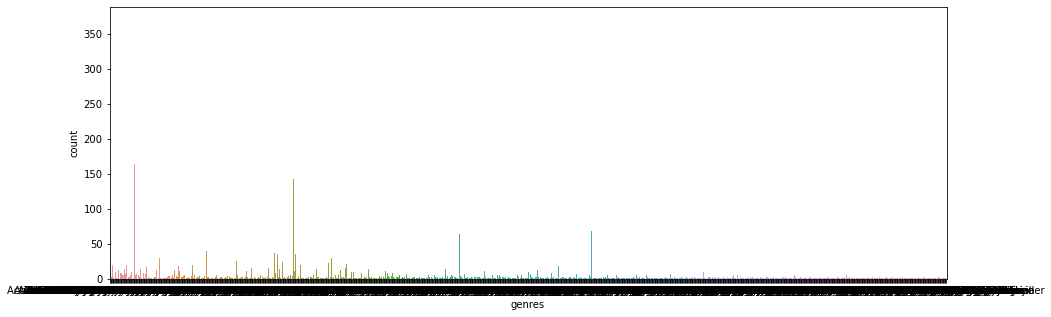

In [7]:
ax=plt.figure(figsize=(15,5))
ax = sns.countplot('genres',data=movies_data)


<AxesSubplot:>

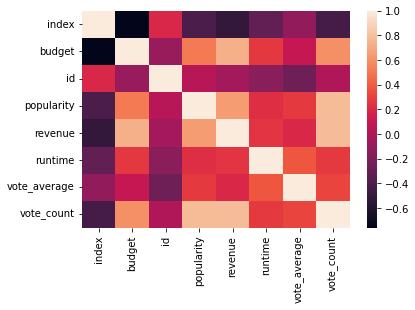

In [8]:
corr=movies_data.corr()
sns.heatmap(corr)

### Finding the Null Values

In [9]:
display (movies_data.isna().sum())

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [10]:
display (movies_data[selected_features].head())

,genres,keywords,tagline,cast,director
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Enter the World of Pandora.,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"At the end of the world, the adventure begins.",Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,Action Adventure Crime,spy based on novel secret agent sequel mi6,A Plan No One Escapes,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,The Legend Ends,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,"Lost in our world, found in another.",Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton


In [11]:
display (movies_data[selected_features].isna().sum())

genres       28
keywords    412
tagline     844
cast         43
director     30
dtype: int64

In [12]:
for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('')
display (movies_data.head())


,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [13]:

combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']
display (combined_features)


0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object

## Demographic Filtering
Demographic Recommender system generate recommendations based on the user demographic attributes. It categorize the users based on their attributes and recommends the movies by utilizing their demographic data.
They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. 
We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So, I'll be using IMDB's weighted rating (wr) which is given as :-

        ![image.png](attachment:image.png)    
where,

v is the number of votes for the movie;

m is the minimum votes required to be listed in the chart;

R is the average rating of the movie;

C is the mean vote across the whole report

In [14]:
C = movies_data['vote_average'].mean()
C

6.092171559442011

So, the mean rating for all the movies is approx 6 on a scale of 10.Now we will determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 90th percentile as our cutoff.

In [15]:
m= movies_data['vote_count'].quantile(0.9)
m

1838.4000000000015

In [16]:
q_movies = movies_data.copy().loc[movies_data['vote_count'] >= m]
q_movies.shape

(481, 24)

Here we can see that the dataset has been filtered out based on the criteria we mentioned giving us 481 movies qualified

In [17]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [18]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(15)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular Movies')

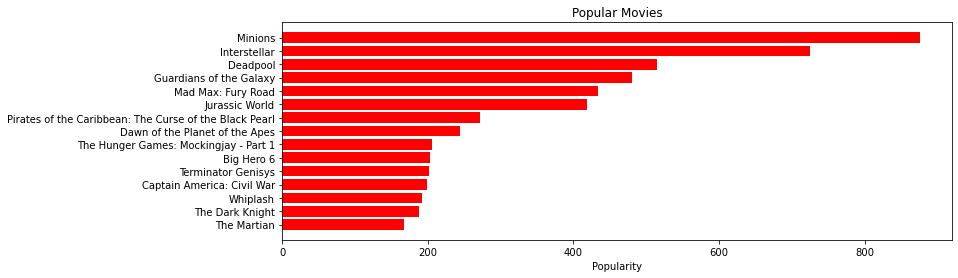

In [19]:
chart = movies_data.sort_values('popularity', ascending=False)

plt.figure(figsize=(12,4))

plt.barh(chart['title'].head(15),chart['popularity'].head(15), align='center',
        color='red')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

### Vectorization of Data
Vectorization is used to speed up the Python code without using loop. Using such a function can help in minimizing the running time of code efficiently. Various operations are being performed over vector such as dot product of vectors which is also known as scalar product as it produces single output, outer products which results in square matrix of dimension equal to length X length of the vectors, Element wise multiplication which products the element of same indexes and dimension of the matrix remain unchanged.

In [20]:
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)
display (feature_vectors.shape)
print (feature_vectors)


(4803, 17318)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

## Content Based Filtering using Cosine Similarity
A Content-Based Recommender works by the data that we take from the user, either explicitly (rating) or implicitly (clicking on a link). By the data we create a user profile, which is then used to suggest to the user, as the user provides more input or take more actions on the recommendation, the engine becomes more accurate.

Cosine similarity is a metric, helpful in determining, how similar the data objects are irrespective of their size. We can measure the similarity between two sentences in Python using Cosine Similarity. It can be used to compare documents or, say, give a ranking of documents with respect to a given vector of query words. Let x and y be two vectors for comparison. Using the cosine measure as a similarity function, we have

###### Cos(x, y) = x . y / ||x|| * ||y||
where,

x . y = product (dot) of the vectors ‘x’ and ‘y’.
||x|| and ||y|| = length of the two vectors ‘x’ and ‘y’.
||x|| * ||y|| = cross product of the two vectors ‘x’ and ‘y


In [21]:
similarity = cosine_similarity(feature_vectors)
print  (similarity )


[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [22]:
display(similarity.shape)

(4803, 4803)

In [23]:
#lists all the movie titles
list_of_all_titles = movies_data['title'].tolist()
print(list_of_all_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [24]:
movie_name = input(' Enter your favourite movie name : ')

 Enter your favourite movie name : pan


In [25]:
len(list_of_all_titles)

4803

In [26]:
find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)
#gives the closest match possible to the title given by users

['Spawn', 'Pan', 'Orphan']


In [27]:
close_match = find_close_match[0]
print(close_match)


Spawn


In [28]:
index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]
print(index_of_the_movie)


1192


In [29]:
similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)
#finding the similarity score of the movie with the given movie by the user.

[(0, 0.04313963166621028), (1, 0.02721460977264385), (2, 0.08542866666214632), (3, 0.0384383975875716), (4, 0.0734094652731318), (5, 0.02474583750738278), (6, 0.01587149082469536), (7, 0.16004845058691297), (8, 0.028896726675105025), (9, 0.13605561846708297), (10, 0.048522154068419865), (11, 0.10094776924133432), (12, 0.024390611230456508), (13, 0.011826953487019547), (14, 0.1321673177636034), (15, 0.03941773829537201), (16, 0.1517599526469107), (17, 0.0233324511761971), (18, 0.042612362012549865), (19, 0.03692385784290479), (20, 0.05253231269226252), (21, 0.02532730461227275), (22, 0.07113896962932315), (23, 0.015868581040052905), (24, 0.012103257961467863), (25, 0.010044083882801216), (26, 0.06348965821009331), (27, 0.029224402978029168), (28, 0.032084945706846425), (29, 0.0738027411547602), (30, 0.0874659786903293), (31, 0.06969706370033221), (32, 0.06561240685578174), (33, 0.14165093496691133), (34, 0.009380523025961422), (35, 0.04391776424306065), (36, 0.0560351352479512), (37, 0.

In [30]:
len(similarity_score)

4803

In [31]:
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
print(sorted_similar_movies)


[(1192, 1.0000000000000002), (788, 0.16877082751743036), (46, 0.16368896628363216), (126, 0.16120700710092536), (7, 0.16004845058691297), (16, 0.1517599526469107), (163, 0.150004928745987), (79, 0.14913721578497155), (182, 0.14494228768845216), (511, 0.14388877599797364), (4759, 0.14376884284270028), (33, 0.14165093496691133), (64, 0.14030267930341364), (4401, 0.13862347383918325), (9, 0.13605561846708297), (38, 0.135756584046648), (203, 0.13523891141845376), (3965, 0.13295274338433047), (3616, 0.1329042009595594), (14, 0.1321673177636034), (700, 0.12947226145902177), (1764, 0.12933004914408328), (174, 0.12680573478168866), (666, 0.12470703987297731), (870, 0.12155320208239198), (452, 0.11985003914509518), (72, 0.119157065298919), (3014, 0.11751532890325599), (2586, 0.11637165892294829), (1177, 0.11522769502260036), (1977, 0.11426829993548658), (2448, 0.10807649769140297), (1633, 0.10515091473331979), (1999, 0.10267454821717266), (753, 0.102384157867765), (4440, 0.10188737344760367), (

In [32]:
movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = movies_data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1


 Enter your favourite movie name : pan
Movies suggested for you : 

1 . Spawn
2 . Deadpool
3 . X-Men: Days of Future Past
4 . Thor: The Dark World
5 . Avengers: Age of Ultron
6 . The Avengers
7 . Watchmen
8 . Iron Man 2
9 . Ant-Man
10 . X-Men
11 . The Image Revolution
12 . X-Men: The Last Stand
13 . X-Men: Apocalypse
14 . The Helix... Loaded
15 . Batman v Superman: Dawn of Justice
16 . The Amazing Spider-Man 2
17 . X2
18 . Never Back Down 2: The Beatdown
19 . Robin and Marian
20 . Man of Steel
21 . 2 Guns
22 . Return to Oz
23 . The Incredible Hulk
24 . I, Frankenstein
25 . Superman II
26 . Space Jam
27 . Suicide Squad
28 . The Dead Zone
29 . Firestarter
